In [431]:
import glob
IMG_NAMES_FULL = []
IMG_NAMES_FULL.extend(glob.glob("rc_dataset\\Subru\\json/*.json"))
IMG_NAMES_FULL.extend(glob.glob("rc_dataset\\Subru1\\json/*.json"))
IMG_NAMES_FULL.extend(glob.glob("rc_dataset\\Noufan\\json/*.json"))
IMG_NAMES_FULL.extend(glob.glob("rc_dataset\\Akshaya\\json/*.json"))
IMG_NAMES_FULL.extend(glob.glob("rc_dataset\\Old\\json/*.json"))
IMG_NAMES_FULL[:5], len(IMG_NAMES_FULL)

(['rc_dataset\\Subru\\json\\record_100.json',
  'rc_dataset\\Subru\\json\\record_1000.json',
  'rc_dataset\\Subru\\json\\record_1001.json',
  'rc_dataset\\Subru\\json\\record_1002.json',
  'rc_dataset\\Subru\\json\\record_1003.json'],
 27323)

In [432]:
# def simplify_angle(angle):
#     passive_angle = abs(angle)
#     restorer = angle / passive_angle
#     simplified_angle = angle
    
#     if passive_angle <= 0.125:
#         simplified_angle = 0
#     elif passive_angle <= 0.25:
#         simplified_angle = 0.25
#     elif passive_angle <= 0.5:
#         simplified_angle = 0.5
#     elif passive_angle <= 0.75:
#         simplified_angle = 0.75
#     elif passive_angle <= 1:
#         simplified_angle = 1

# #     if passive_angle <= 0.125:
# #         simplified_angle = 0
# #     elif passive_angle < 0.5:
# #         simplified_angle = 0.35
# #     elif passive_angle <= 1:
# #         simplified_angle = 0.75
    
#     if simplified_angle == 0:
#         return simplified_angle
#     else:
#         return restorer*simplified_angle

import math

def simplify_angle(angle):
    skip_n = 
#     if -0.2<angle<0.2:
#         angle = 0
    angle = round(angle, 1)
    if angle == 0:
        angle = abs(angle)
    if (abs(angle)*10 % skip_n) != 0:
        angle = angle*10
#         if abs(angle) == 10:
#             arb = 1
#         else:
#             arb = skip_n
        angle += (angle/abs(angle)) * (skip_n-(abs(angle) % skip_n))
        if abs(angle) > 10:
            angle = (angle/abs(angle)) * 10
        angle /= 10
#     if 0.75<angle<0.85:
#         print(o)
    return angle

In [487]:
simplify_angle(-0.6147451782226562)

-0.6

In [434]:
print(round(-0.4247451782226562, 1))

-0.4


In [435]:
import numpy as np
import json
import cv2
from collections import defaultdict 

angle_counter = defaultdict(int)

image_arr = []

dataset = {
    'image_name': [],
    'angle': [],
    'throttle': [],
}

for filename in IMG_NAMES_FULL:
    with open(filename, 'r') as f:
        data = f.read()
        json_data = json.loads(data)
        angle = simplify_angle(json_data['user/angle'])
        if -0.1<angle<0.1: angle = abs(angle)
        path_split = IMG_NAMES_FULL[0].split('\\')
        img_path = '\\'.join(path_split[:-2])
        img = cv2.imread(img_path + '/images/' + json_data['cam/image_array'])

        try:
            if img.shape == (120, 160, 3):
#                 if angle_counter[str(angle)] < 50000:
                if angle_counter[str(angle)] < 1326:
                    image_arr.append(img)
                    dataset['image_name'].append(json_data['cam/image_array'])
                    dataset['angle'].append(angle)
                    dataset['throttle'].append(json_data['user/throttle'])
                    angle_counter[str(angle)] += 1

                    if angle != 0:
                        image_arr.append(cv2.flip(img, 1))
                        dataset['image_name'].append(json_data['cam/image_array'][:-4] + 'aug' + json_data['cam/image_array'][-4:])
                        dataset['angle'].append(-angle)
                        dataset['throttle'].append(json_data['user/throttle'])
                        angle_counter[str(-angle)] += 1
        except:
            pass

In [488]:
-(4%3)

-1

In [437]:
image_arr = np.array(image_arr, dtype='uint8')

In [438]:
image_arr.shape

(14586, 120, 160, 3)

In [439]:
import pandas as pd
df = pd.DataFrame (dataset, columns = ['image_name', 'angle', 'throttle'])

In [390]:
path_split = IMG_NAMES_FULL[0].split('\\')
path = '\\'.join(path_split[:-2])
path

'rc_dataset\\Subru'

In [440]:
df['angle'].describe()

count    14586.000000
mean         0.000000
std          0.632477
min         -1.000000
25%         -0.600000
50%          0.000000
75%          0.600000
max          1.000000
Name: angle, dtype: float64

In [441]:
df['angle'].value_counts()

 0.2    1326
 0.6    1326
 0.8    1326
-0.6    1326
-0.4    1326
-0.2    1326
-0.8    1326
 0.4    1326
-1.0    1326
 1.0    1326
 0.0    1326
Name: angle, dtype: int64

In [442]:
df['throttle'].value_counts()

0.500000    7145
0.650000    3436
0.700000    2961
0.450000     956
0.550000      56
0.923809      10
0.328571       8
0.380952       6
0.928571       6
1.000000       2
Name: throttle, dtype: int64

In [443]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# le = LabelEncoder()
# le.fit(df['angle'])
# le_angle = le.transform(df['angle'])

ohe = OneHotEncoder(handle_unknown='ignore')
temp_angle = [[str(i)] for i in df['angle']]
ohe.fit(temp_angle)
ohe_angle = ohe.transform(temp_angle)

In [444]:
# le_angle
ohe_angle

<14586x11 sparse matrix of type '<class 'numpy.float64'>'
	with 14586 stored elements in Compressed Sparse Row format>

In [445]:
# le.classes_
enc_angle = ohe_angle.toarray()

In [446]:
# enc_df = df.assign(enc_angle = le_angle)
enc_angle[3]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [69]:
# enc_df.head(5)

In [21]:
# enc_df['enc_angle'].describe()

In [23]:
# enc_df['enc_angle'].value_counts()
# ohe.inverse_transform([[1,0,0,0,0]])

In [205]:
# zero_angle = enc_df[enc_df.enc_angle==4]
# non_zero_angle = enc_df[enc_df.enc_angle!=4]

# non_zero_angle.describe(), zero_angle.describe()

In [206]:
# from sklearn.utils import resample

# zero_downsampled = resample(zero_angle, 
#                                  replace=False,    # sample without replacement
#                                  n_samples=2000,     # to match minority class
#                                  random_state=3) # reproducible results
 
# # Combine minority class with downsampled majority class
# df_downsampled = pd.concat([zero_downsampled, non_zero_angle])
 
# # Display new class counts
# df_downsampled.enc_angle.value_counts()

In [447]:
# df_downsampled
enc_angle.shape, df['throttle'].shape

((14586, 11), (14586,))

In [448]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain_angle, ytest_angle, ytrain_throttle, ytest_throttle = train_test_split(image_arr, enc_angle, df['throttle'], test_size=0.2, random_state=1, stratify=enc_angle)

In [449]:
Xtrain, Xval, ytrain_angle, yval_angle, ytrain_throttle, yval_throttle = train_test_split(Xtrain, ytrain_angle, ytrain_throttle, test_size=0.2, random_state=1, stratify=ytrain_angle)

In [475]:
def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, 100, 200)
    return canny

#     hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 
#     lower_white = np.array([0,0,227])
#     upper_white = np.array([90,10,255])      
#     mask = cv2.inRange(hsv, lower_white, upper_white) 
#     res = cv2.bitwise_and(image,image, mask= mask) 
#     # finds edges in the input image image and 
#     # marks them in the output map edges 
#     edges = cv2.Canny(image,200,250)
#     return edges

def preprocess_image(img):
    height = img.shape[0]
    width = img.shape[1]
    if height:
        canny_img = canny(img)
#         grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#         hist_eq_img = cv2.equalizeHist(grayscale)
        rescaled_img = cv2.resize(hist_eq_img, (int(width*0.5), int(height*0.5)))
        normalised_img = rescaled_img/255
        roi = normalised_img[23:height, :]
        return roi
    else:
        return img

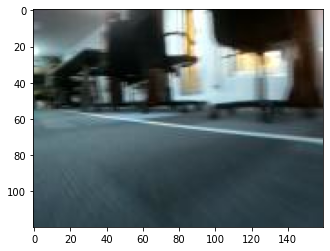

In [476]:
import matplotlib.pyplot as plt    
plt.imshow(Xtrain[10])

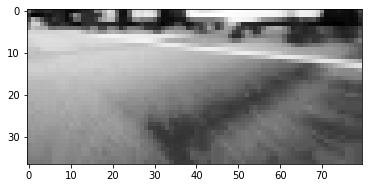

In [477]:
plt.imshow(preprocess_image(Xtrain[10]), cmap='gray')

In [453]:
#SqueezeNet Implementation
def fire_module(input_layer,n_squeeze,n_expand):
    squeezeLayer= Convolution2D(n_squeeze, (1, 1), activation='relu', padding ='valid')(input_layer)
    expandLayer1= Convolution2D(n_expand, (1, 1), activation='relu', padding ='valid')(squeezeLayer)
    expandLayer2= Convolution2D(n_expand,(3, 3), activation='relu', padding ='same')(squeezeLayer)
    squeezed = concatenate([expandLayer1, expandLayer2], axis=3)
    return squeezed

In [454]:
from keras.models import Model
from keras.layers import Input, merge, concatenate
from keras.layers.core import Flatten, Dense, Dropout, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D, AveragePooling2D
import keras.utils.np_utils as kutils
from keras.optimizers import Adam

In [478]:
from keras.layers import Lambda

def squeezenet():
    # Model Construction
    input_layer = Input(shape=(120, 160, 3), name="input_layer")
    
#     x = preprocess_image(input_layer)
    x = Lambda(preprocess_image, name="preprocess_layer")(input_layer)

    #conv 1
    x = Convolution2D(96, (3, 3), activation='relu', strides=(2, 2), padding='valid')(x)
#     x = Convolution2D(64, (3, 3), activation='relu', strides=(2, 2), padding='valid')(x)
    #maxpool 1
    x = MaxPooling2D(pool_size=(2,2), strides=(2, 2))(x)
#     x = MaxPooling2D(pool_size=(3,3), strides=(2, 2))(x)
    #1
    x = fire_module(x, 16, 16)
    #2
    x = fire_module(x, 16, 16)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)
    #3
    x = fire_module(x, 32,32)
    #4
    x = fire_module(x, 32, 32)

    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2),padding='same')(x)
    #5
    x = fire_module(x, 48,48)
    #6
    x = fire_module(x, 48,48)
    #7
    x = fire_module(x,64,64)
    #8
    x = fire_module(x, 64,64)
    x =Dropout(0.5)(x)

    #10th layer
    x = Convolution2D(10, (1, 1), activation='relu',  padding='valid')(x)
#     x = Convolution2D(5, (1, 1), activation='relu',  padding='valid')(x)
    x= Flatten()(x)

    #output
    #out = Dense(n_classes, activation="softmax")(x)
    #For regression

#     angle_out = Dense(1,activation='linear', name='angle_out')(x)
    angle_out = Dense(11,activation='softmax', name='angle_out')(x)
    throttle_out = Dense(1, activation='linear', name='throttle_out')(x)
    
    model = Model(inputs=[input_layer], outputs=[angle_out, throttle_out])
    adam = Adam(lr = 0.0001)
#     adam = Adam()
    model.compile(optimizer=adam, 
                  loss={'angle_out': 'categorical_crossentropy',
                        'throttle_out': 'mse'},
                  metrics={'angle_out': ['accuracy'],
                           'throttle_out': ['mae']})

    return model


In [479]:
model = squeezenet()
model.summary()

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        (None, 120, 160, 3)  0                                            
__________________________________________________________________________________________________
preprocess_layer (Lambda)       (None, 120, 160, 3)  0           input_layer[0][0]                
__________________________________________________________________________________________________
conv2d_339 (Conv2D)             (None, 59, 79, 96)   2688        preprocess_layer[0][0]           
__________________________________________________________________________________________________
max_pooling2d_40 (MaxPooling2D) (None, 29, 39, 96)   0           conv2d_339[0][0]                 
___________________________________________________________________________________________

In [459]:
from keras.models import load_model
model = load_model('transfer/track-model.h5')

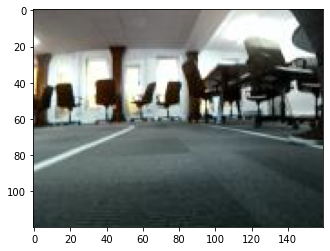

In [468]:
plt.imshow(Xtest[0])

In [470]:
ytest_angle[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [469]:
np.argmax(model.predict(Xtest[:1])[0])

0

In [480]:
# import tensorflow as tf 
import os
import keras

EPOCHS = 25
# checkpoint_filepath = 'checkpoints/autopilot.h5'
# model_filename = "test-Epoch-{epoch:02d}"
model_filename = "rc-transfer-model.h5"
checkpoint_filepath = os.path.join('checkpoints/', model_filename)
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_angle_out_accuracy',
    mode='max',
    save_best_only=True)

In [481]:
Xtrain.shape, ytrain_throttle.shape

((9334, 120, 160, 3), (9334,))

In [482]:
Xtrain[0].shape

(120, 160, 3)

In [483]:
# history = model.fit(Xtrain, [ytrain.enc_angle, ytrain.throttle], epochs=EPOCHS, validation_data=(Xval, [yval.enc_angle, yval.throttle]), batch_size=128, verbose = 1, shuffle=1, callbacks=[model_checkpoint_callback])
history = model.fit(Xtrain, [ytrain_angle, ytrain_throttle], epochs=EPOCHS, validation_data=(Xval, [yval_angle, yval_throttle]), batch_size=64, verbose = 1, shuffle=1, callbacks=[model_checkpoint_callback])

Train on 9334 samples, validate on 2334 samples
Epoch 1/25
9334/9334 [==============================] - 93s 10ms/step - loss: 2.4370 - angle_out_loss: 2.4080 - throttle_out_loss: 0.0290 - angle_out_accuracy: 0.0960 - throttle_out_mae: 0.1248 - val_loss: 2.4043 - val_angle_out_loss: 2.3936 - val_throttle_out_loss: 0.0107 - val_angle_out_accuracy: 0.1157 - val_throttle_out_mae: 0.0900
Epoch 2/25
9334/9334 [==============================] - 92s 10ms/step - loss: 2.4053 - angle_out_loss: 2.3906 - throttle_out_loss: 0.0148 - angle_out_accuracy: 0.1088 - throttle_out_mae: 0.0997 - val_loss: 2.3922 - val_angle_out_loss: 2.3805 - val_throttle_out_loss: 0.0118 - val_angle_out_accuracy: 0.1859 - val_throttle_out_mae: 0.0943
Epoch 3/25
9334/9334 [==============================] - 90s 10ms/step - loss: 2.3884 - angle_out_loss: 2.3714 - throttle_out_loss: 0.0170 - angle_out_accuracy: 0.1499 - throttle_out_mae: 0.1063 - val_loss: 2.3613 - val_angle_out_loss: 2.3483 - val_throttle_out_loss: 0.0134 - 

9334/9334 [==============================] - 138s 15ms/step - loss: 1.6688 - angle_out_loss: 1.6438 - throttle_out_loss: 0.0253 - angle_out_accuracy: 0.4165 - throttle_out_mae: 0.1272 - val_loss: 1.8992 - val_angle_out_loss: 1.8846 - val_throttle_out_loss: 0.0137 - val_angle_out_accuracy: 0.3363 - val_throttle_out_mae: 0.0976


In [ ]:
ypred = model.predict(Xtest)

In [ ]:
score = model.evaluate(Xtest, [ytest_angle, ytest_throttle])

In [ ]:
score

In [ ]:
print(history.history.keys())

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['angle_out_accuracy'])
plt.plot(history.history['val_angle_out_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [340]:
model.save('models/fd-canny-rc-e25.h5')

In [157]:
ypred[0][0], ypred[1][0]

(array([7.9949405e-03, 3.6462958e-03, 3.3952059e-05, 4.8098036e-06,
        9.8420703e-01, 4.0128957e-03, 8.7857574e-05, 1.1620988e-05,
        6.3370993e-07], dtype=float32),
 array([0.00803646], dtype=float32))

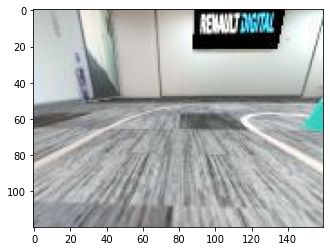

In [321]:
plt.imshow(Xtest[88])

In [45]:
def decode(angle_out):
    # angle_list = [-1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0]
    # angle_list = [-0.75, -0.25, 0.0, 0.25, 0.75]
#     ohe_angle_list = [-0.35, -0.75, 0, 0.35, 0.75]
    ohe_angle_list = [-0.25, -0.5, -0.75, -1, 0, 0.25, 0.5, 0.75, 1]
    le = LabelEncoder()
    le.fit(ohe_angle_list)
    return list(le.inverse_transform(angle_out))[0]

In [54]:
for i in range(len(ypred[0])):
    print(i, decode([np.argmax(ypred[0][i])]))

0 0.75
1 0.75
2 0.35
3 0.35
4 -0.75
5 0.0
6 -0.75
7 0.35
8 0.0
9 -0.35
10 0.0
11 0.0
12 0.35
13 0.0
14 0.0
15 -0.75
16 0.75
17 0.35
18 -0.75
19 0.75
20 -0.35
21 -0.35
22 0.0
23 0.0
24 0.35
25 -0.35
26 -0.35
27 -0.75
28 0.0
29 0.75
30 0.35
31 0.0
32 0.35
33 0.75
34 -0.75
35 -0.35
36 0.0
37 -0.75
38 -0.35
39 0.75
40 -0.75
41 -0.75
42 -0.35
43 0.0
44 0.35
45 0.35
46 0.35
47 -0.75
48 -0.75
49 0.0
50 -0.75
51 0.0
52 0.0
53 -0.35
54 0.35
55 -0.75
56 0.0
57 0.75
58 -0.75
59 0.35
60 -0.75
61 0.35
62 0.35
63 0.0
64 -0.75
65 -0.35
66 0.35
67 -0.75
68 0.75
69 -0.75
70 0.0
71 0.75
72 0.35
73 0.75
74 -0.35
75 0.0
76 -0.35
77 -0.35
78 0.0
79 0.0
80 -0.35
81 -0.75
82 0.35
83 0.0
84 0.35
85 -0.75
86 0.0
87 -0.35
88 -0.75
89 0.75
90 0.75
91 0.35
92 0.35
93 -0.75
94 -0.75
95 0.35
96 -0.75
97 -0.35
98 -0.35
99 0.0
100 0.0
101 0.35
102 0.75
103 -0.75
104 0.0
105 0.0
106 -0.35
107 0.0
108 0.0
109 -0.35
110 0.35
111 -0.75
112 -0.75
113 0.0
114 0.35
115 -0.35
116 0.35
117 0.35
118 0.0
119 0.75
120 0.75
121 0

928 0.75
929 0.35
930 -0.75
931 0.35
932 0.0
933 -0.75
934 -0.35
935 -0.75
936 0.75
937 -0.35
938 -0.35
939 0.75
940 0.75
941 0.75
942 0.35
943 0.0
944 -0.35
945 -0.35
946 0.0
947 -0.35
948 0.75
949 0.0
950 0.0
951 0.75
952 -0.35
953 0.75
954 -0.75
955 0.35
956 0.0
957 0.75
958 -0.75
959 0.0
960 0.0
961 0.35
962 0.35
963 -0.75
964 -0.75
965 -0.75
966 0.35
967 -0.75
968 0.75
969 -0.35
970 -0.75
971 0.35
972 0.75
973 -0.75
974 0.0
975 -0.75
976 -0.75
977 -0.75
978 -0.75
979 0.0
980 -0.35
981 -0.75
982 0.0
983 0.0
984 -0.35
985 0.75
986 -0.35
987 0.0
988 -0.75
989 0.35
990 -0.75
991 0.35
992 0.35
993 -0.75
994 -0.35
995 -0.75
996 0.0
997 0.0
998 0.35
999 -0.35
1000 0.0
1001 -0.35
1002 0.35
1003 -0.75
1004 -0.75
1005 0.35
1006 0.35
1007 0.75
1008 0.0
1009 -0.75
1010 -0.35
1011 -0.75
1012 -0.75
1013 -0.35
1014 0.0
1015 -0.75
1016 0.75
1017 -0.75
1018 -0.75
1019 -0.75
1020 0.35
1021 0.75
1022 0.0
1023 -0.75
1024 -0.35
1025 -0.75
1026 0.35
1027 0.35
1028 0.75
1029 -0.75
1030 0.35
1031 -0.75
1

1796 -0.75
1797 0.0
1798 0.35
1799 0.35
1800 0.0
1801 -0.75
1802 0.75
1803 0.75
1804 -0.75
1805 0.0
1806 0.0
1807 0.75
1808 0.35
1809 -0.75
1810 -0.75
1811 -0.35
1812 0.35
1813 0.0
1814 0.35
1815 0.0
1816 0.35
1817 -0.75
1818 0.35
1819 0.75
1820 -0.75
1821 0.0
1822 0.0
1823 -0.75
1824 0.35
1825 0.35
1826 0.75
1827 -0.75
1828 0.35
1829 0.0
1830 -0.75
1831 -0.35
1832 -0.75
1833 0.35
1834 0.0
1835 -0.75
1836 -0.75
1837 0.75
1838 0.75
1839 -0.75
1840 0.35
1841 0.35
1842 0.0
1843 0.0
1844 0.75
1845 0.35
1846 -0.35
1847 0.35
1848 -0.75
1849 -0.35
1850 0.0
1851 0.0
1852 0.75
1853 0.0
1854 -0.35
1855 0.0
1856 -0.75
1857 0.0
1858 0.0
1859 0.0
1860 -0.35
1861 -0.75
1862 -0.75
1863 0.35
1864 -0.75
1865 0.0
1866 0.35
1867 -0.75
1868 0.75
1869 0.0
1870 0.0
1871 0.75
1872 -0.75
1873 -0.75
1874 0.0
1875 -0.35
1876 -0.35
1877 0.35
1878 -0.75
1879 -0.75
1880 -0.75
1881 -0.75
1882 -0.75
1883 0.35
1884 0.35
1885 -0.75
1886 0.75
1887 -0.75
1888 -0.35
1889 -0.75
1890 -0.75
1891 0.35
1892 0.0
1893 0.35
1894

2635 -0.75
2636 -0.75
2637 0.0
2638 0.35
2639 0.35
2640 -0.35
2641 0.35
2642 -0.75
2643 -0.75
2644 0.0
2645 0.0
2646 -0.75
2647 0.75
2648 -0.75
2649 0.0
2650 -0.75
2651 0.35
2652 0.75
2653 -0.75
2654 0.0
2655 0.0
2656 0.35
2657 0.0
2658 0.75
2659 -0.75
2660 0.0
2661 0.0
2662 0.0
2663 -0.75
2664 -0.35
2665 -0.75
2666 0.0
2667 0.0
2668 0.35
2669 0.0
2670 0.75
2671 0.35
2672 0.0
2673 0.75
2674 0.35
2675 0.0
2676 0.0
2677 0.75
2678 0.35
2679 0.35
2680 -0.75
2681 0.0
2682 -0.75
2683 0.35
2684 0.35
2685 0.35
2686 0.75
2687 0.0
2688 0.0
2689 0.75
2690 -0.75
2691 0.35
2692 0.35
2693 0.35
2694 0.0
2695 -0.75
2696 -0.35
2697 -0.75
2698 0.0
2699 0.35
2700 0.35
2701 0.0
2702 0.75
2703 0.35
2704 0.0
2705 -0.75
2706 0.0
2707 0.35
2708 -0.75
2709 0.0
2710 -0.75
2711 0.0
2712 -0.35
2713 0.0
2714 -0.35
2715 -0.75
2716 -0.75
2717 -0.75
2718 0.75
2719 0.0
2720 0.0
2721 -0.75
2722 0.75
2723 0.0
2724 0.0
2725 -0.75
2726 -0.75
2727 0.35
2728 -0.35
2729 -0.75
2730 -0.75
2731 -0.35
2732 -0.75
2733 -0.75
2734 

In [31]:
def decode(angle_out):
    print(angle_out)
    angle_list = [-1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0]
    le = LabelEncoder()
    le.fit(angle_list)
    print('hjfhjddbg', list(le.inverse_transform(angle_out)))
    return list(le.inverse_transform(angle_out))[0]


decode([4])

[4]
hjfhjddbg [0.0]


0.0

In [57]:
model.get_weights()

[array([[[[-4.62447368e-02,  7.76162520e-02, -8.19034725e-02, ...,
            5.29352985e-02, -5.24256788e-02, -2.43415684e-03],
          [-8.50109756e-02,  1.10338749e-02, -8.28009918e-02, ...,
            7.70099908e-02,  4.37569581e-02, -6.77246153e-02],
          [ 8.74335021e-02,  3.81169356e-02,  9.24635381e-02, ...,
           -1.85047891e-02,  7.76680782e-02,  1.56389177e-03]],
 
         [[ 2.57515665e-02, -9.58547145e-02,  1.25502991e-02, ...,
           -9.93980169e-02,  3.72288004e-02, -5.78279234e-02],
          [ 3.79497558e-02,  7.02159628e-02, -4.26071025e-02, ...,
           -4.23867404e-02,  8.25489461e-02,  3.61544788e-02],
          [-2.25980058e-02, -6.52361289e-02,  4.23028767e-02, ...,
           -3.30230743e-02, -2.67958380e-02, -4.16750088e-02]],
 
         [[ 6.86972961e-02, -2.28357892e-02,  7.26434216e-02, ...,
            1.22516528e-02, -5.13048563e-03, -3.03066969e-02],
          [ 1.85590629e-02,  7.10190684e-02,  2.79198657e-03, ...,
            5.414

In [66]:
Xtest[0].shape

(120, 160, 3)

In [68]:
model.predict(Xtest[0].reshape((1,) + Xtest[0].shape))

[array([[2.9340843e-04, 6.9702812e-04, 3.8402525e-03, 2.5195190e-01,
         7.4321741e-01]], dtype=float32),
 array([[0.1627238]], dtype=float32)]

In [70]:
test_img = cv2.imread('C:\\Users\\subru\\Downloads\\sim_data\\data\\gen_track_user_drv_right_lane\\235_cam-image_array_.jpg')

In [71]:
model.predict(test_img.reshape((1,) + test_img.shape))

[array([[0.01726126, 0.00325774, 0.07472245, 0.07975881, 0.82499975]],
       dtype=float32),
 array([[0.3088115]], dtype=float32)]